# Import

In [2]:
import numpy as np
from PIL import Image
import pandas as pd
from torchvision import transforms
import matplotlib.pyplot as plt

# Dataset

In [3]:
df_train = pd.read_csv(r'D:\sign_mnist_train.csv')

In [5]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# View Images

In [6]:
# extract images from Dataset
df_images = df_train.iloc[:,1:]

#convert images into type of numpy
images_np = df_images.to_numpy(dtype=np.float32)
images_np.shape

(27455, 784)

In [7]:
# convert images_np into type (NxHxWxC)
images_np = images_np.reshape(-1,28,28,1)
images_np.shape

(27455, 28, 28, 1)

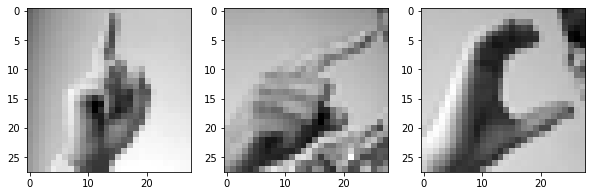

In [36]:
# plot images

fig = plt.figure(figsize=(10,10))
rows, columns = 1, 3

for i in range(rows*columns):
    img = np.reshape(images_np[i], (28,28))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='gray')

plt.show()

# Visualize Image Transform

1.RandomHorizontalFlip()

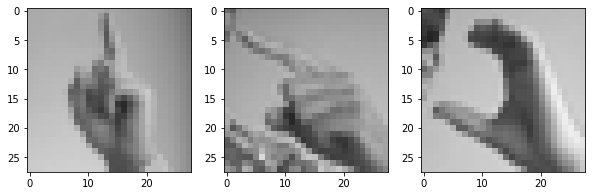

In [38]:
transform_1 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1)
])

fig = plt.figure(figsize=(10,10))
rows, columns = 1, 3

for i in range(rows*columns):
    img_tf = transform_1(images_np[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_tf, cmap='gray')

plt.show()

# The effect is significant, especially for representing sign of left handedness

2.RandomRotation()

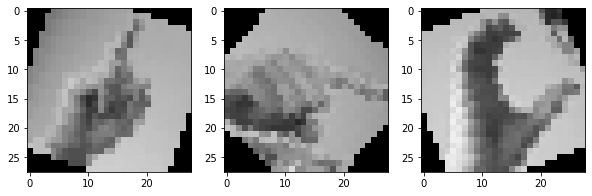

In [48]:
transform_2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(45),
])

fig = plt.figure(figsize=(10,10))
rows, columns = 1, 3

for i in range(rows*columns):
    img_tf = transform_2(images_np[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_tf, cmap='gray')

plt.show()

# the black background after rotation makes our model confused, so that the model can not learn.

3.ColorJitter()

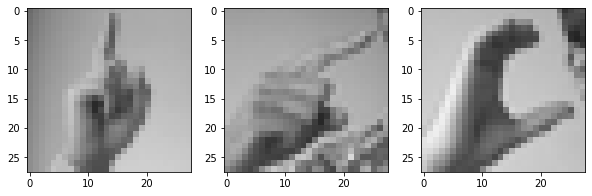

In [47]:
transform_3 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=0, contrast=0)
])

fig = plt.figure(figsize=(10,10))
rows, columns = 1, 3

for i in range(rows*columns):
    img_tf = transform_3(images_np[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_tf, cmap='gray')

plt.show()

# because our pictures have only one channel, the transform of ColorJitter makes almost no sense.

4.RandomAffine()

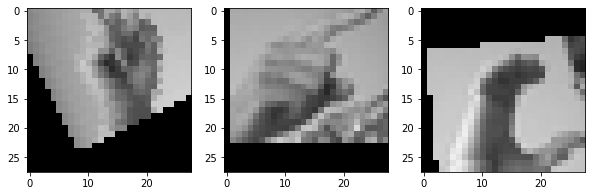

In [50]:
transform_4 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=30, translate=(0.1,0.3))
])

fig = plt.figure(figsize=(10,10))
rows, columns = 1, 3

for i in range(rows*columns):
    img_tf = transform_4(images_np[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_tf, cmap='gray')

plt.show()

5.Combination of RandomHorizontalFlip and RandomHorizontalFlip

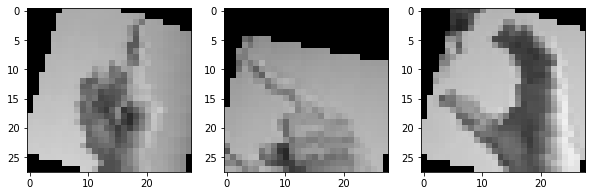

In [51]:
transform_5 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=30, translate=(0.1,0.3)),
    transforms.RandomHorizontalFlip(p=1)
])

fig = plt.figure(figsize=(10,10))
rows, columns = 1, 3

for i in range(rows*columns):
    img_tf = transform_5(images_np[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img_tf, cmap='gray')
